# SPAM SMS FILTER

This notebook illustrates classification of SMS as SPAM or NOT SPAM using Natural Language Preprocessing and applying different classifiers. 

1. Natural Language Processing: It helps computers communicate with humans in their own language and scales other language-related tasks. For example, NLP makes it possible for computers to read text, hear speech, interpret it, measure sentiment and determine which parts are important. 
2. Natural language processing includes many different techniques for interpreting human language, ranging from statistical and machine learning methods to rules-based and algorithmic approaches.
3. These underlying tasks are often used in higher-level NLP capabilities, such as:
    1. Content categorization. A linguistic-based document summary, including search and indexing, content alerts and duplication detection.
    2. Topic discovery and modeling. Accurately capture the meaning and themes in text collections, and apply advanced analytics to text, like optimization and forecasting.
    3. Contextual extraction. Automatically pull structured information from text-based sources.
    4. Sentiment analysis. Identifying the mood or subjective opinions within large amounts of text, including average sentiment and opinion mining. 
    5. Speech-to-text and text-to-speech conversion. Transforming voice commands into written text, and vice versa. 
    6. Document summarization. Automatically generating synopses of large bodies of text.
    7. Machine translation. Automatic translation of text or speech from one language to another.    
4. Applications of NLP:
    1. Investigative discovery. Identify patterns and clues in emails or written reports to help detect and solve crimes.
    2. Subject-matter expertise. Classify content into meaningful topics so you can take action and discover trends.
    3. Social media analytics. Track awareness and sentiment about specific topics and identify key influencers. 

# Loading data

Data consists of 2 atributes: 
    1. label : It has either of 2 values: ham or spam.
    2. text : It is a string of characters containing the message.

In [1]:
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_table('datasets/smsspamCollection/SMSSpamCollection', header=None)
df.head()

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
y = df[0]
y.value_counts()

ham     4825
spam     747
Name: 0, dtype: int64

The target variable is converted to real numbers by setting ham texts as 0 and spam texts as 1.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
#le = preprocessing.LabelEncoder()
#y_enc = le.fit_transform(y)
df = df.replace(['ham','spam'],[0, 1])

In [5]:
df.head()

,0,1
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
raw_text = df[1]

In [7]:
raw_text

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
5       FreeMsg Hey there darling it's been 3 week's n...
6       Even my brother is not like to speak with me. ...
7       As per your request 'Melle Melle (Oru Minnamin...
8       WINNER!! As a valued network customer you have...
9       Had your mobile 11 months or more? U R entitle...
10      I'm gonna be home soon and i don't want to tal...
11      SIX chances to win CASH! From 100 to 20,000 po...
12      URGENT! You have won a 1 week FREE membership ...
13      I've been searching for the right words to tha...
14                    I HAVE A DATE ON SUNDAY WITH WILL!!
15      XXXMobileMovieClub: To use your credit, click ...
16                             Oh k...i'm watching here:)
17      Eh u r

In [8]:
import nltk
#nltk.download_shell()

# Data Preprocessing

Natural Language Tool Kit(nltk) is used to preprocess the data.
1. Normalization: Using Regex we replace common types of words with a single label such as:
    1. Replace email addresses with 'emailaddr'
    2. Replace URLs with 'httpaddr'
    3. Replace money symbols with 'moneysymb'
    4. Replace phone numbers with 'phonenumbr'
    5. Replace numbers with 'numbr'
2. Stop Words: Words, such as "when", "had", "those" or "before", are called stop words and are filtered out using stopwords in nltk.corpus. 
3. Stemming: Words with various suffixes such as "distribute", "distributing", "distributor" or "distribution" are replaced with just "distribut" via a preprocessing step called stemming. This can be done using PorterStemmer in nltk.


In [9]:
import re
import nltk
from nltk.corpus import stopwords
stop_words = nltk.corpus.stopwords.words('english')
porter = nltk.PorterStemmer()
def preprocess_text(messy_string):
    assert(type(messy_string) == str)
    cleaned = re.sub(r'\b[\w\-.]+?@\w+?\.\w{2,4}\b', 'emailaddr', messy_string)
    cleaned = re.sub(r'(http[s]?\S+)|(\w+\.[A-Za-z]{2,4}\S*)', 'httpaddr',
                     cleaned)
    cleaned = re.sub(r'£|\$', 'moneysymb', cleaned)
    cleaned = re.sub(
        r'\b(\+\d{1,2}\s)?\d?[\-(.]?\d{3}\)?[\s.-]?\d{3}[\s.-]?\d{4}\b',
        'phonenumbr', cleaned)
    cleaned = re.sub(r'\d+(\.\d+)?', 'numbr', cleaned)
    cleaned = re.sub(r'[^\w\d\s]', ' ', cleaned)
    cleaned = re.sub(r'\s+', ' ', cleaned)
    cleaned = re.sub(r'^\s+|\s+?$', '', cleaned.lower())
    return ' '.join(
        porter.stem(term) 
        for term in cleaned.split()
        if term not in set(stop_words)
    )

In [10]:
#An example to show the preprocessing.
preprocess_text( """***** CONGRATlations **** You won 2 tIckETs to Hamilton in 
NYC http://www.hamiltonbroadway.com/J?NaIOl/event   wORtH over $500.00...CALL 
555-477-8914 or send message to: hamilton@freetix.com to get ticket !! """)

'congratl numbr ticket hamilton nyc httpaddr worth moneysymbnumbr call phonenumbr send messag emailaddr get ticket'

In [11]:
#Pocessed raw data
processed = raw_text.apply(preprocess_text)

In [12]:
#print(processed)

# Converting words to vectors using TFIDF Vectorizer

1. Tokenization: Its a process of breaking apart the corpus into a vocabulary of unique terms. 
    Example: "The quick brown fox" can be tokenized as:
    1. "The", "quick", "brown", "fox" - unigrams.
    2. "The quick", "quick brown", "brown fox" - bigrams.
    
2. Assign each n-gram to a feature.
3. Compute the n-gram's frequency using tf-idf statistic:
    1. Term frequency(tf): It tallies the occurrences of each n-gram for every training example.
    2. Inverse document frequency(idf): Some words rarely appear in the overall corpus but show up frequently in certain subsets of messages such as spam. In order to emphasize this, we'll downweight the term frequency with inverse document frequency (idf), which is calculated by logarithmically scaling the inverse of the fraction of training examples that contain a given term.
              tf-idf(t,i) = tf(t,i) × idf(t)
                          = tf(t,i) × log(M/mt)
      where tf(t,i) is the term frequency for term t in the ith training example, M is the total number of training examples, and mt is the number of training examples that contain the term t.
4. Transform a corpus of text data into a matrix of numbers with one row per training example and one column per n-gram using TfidfVectorizer().

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1, 2))
X_ngrams = vectorizer.fit_transform(processed)

In [14]:
X_ngrams.shape

(5572, 36348)

In [15]:
features = X_ngrams

# Splitting Data

In [16]:
X_train, X_test, y_train, y_test = train_test_split(features, df[0], test_size=0.15, random_state=111)

In [17]:
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(4736, 36348)
(836, 36348)
(4736,)
(836,)


# XGBoost Classifier

1. XGBoost is a library for developing fast and high performance gradient boosting tree models.
2. XGBoost achieves the best performance on a range of difficult machine learning tasks.
3. The XGBoost library implements the gradient boosting decision tree algorithm.
4. Gradient boosting is an approach where new models are created that predict the residuals or errors of prior models and then added together to make the final prediction.

In [18]:
import xgboost as xgb

# Set our parameters for xgboost
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'error'
params['eta'] = 0.02
params['max_depth'] = 10

d_train = xgb.DMatrix(X_train, label=y_train)

watchlist = [(d_train, 'train')]

bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=400, verbose_eval=10)

[0]	train-error:0.015836
Will train until train-error hasn't improved in 400 rounds.
[10]	train-error:0.015836
[20]	train-error:0.014358
[30]	train-error:0.01478
[40]	train-error:0.013514
[50]	train-error:0.013514
[60]	train-error:0.013514
[70]	train-error:0.013514
[80]	train-error:0.013091
[90]	train-error:0.012247
[100]	train-error:0.011613
[110]	train-error:0.011191
[120]	train-error:0.011191
[130]	train-error:0.011191
[140]	train-error:0.01098
[150]	train-error:0.010557
[160]	train-error:0.010135
[170]	train-error:0.009924
[180]	train-error:0.008868
[190]	train-error:0.008868
[200]	train-error:0.008868
[210]	train-error:0.009079
[220]	train-error:0.009079
[230]	train-error:0.008657
[240]	train-error:0.008657
[250]	train-error:0.008657
[260]	train-error:0.008235
[270]	train-error:0.008235
[280]	train-error:0.008235
[290]	train-error:0.008024
[300]	train-error:0.007812
[310]	train-error:0.007812
[320]	train-error:0.00739
[330]	train-error:0.00739
[340]	train-error:0.00739
[350]	train

In [19]:
from sklearn.metrics import accuracy_score
import numpy as np
# Predict values for test set
d_test = xgb.DMatrix(X_test)
p_test = bst.predict(d_test)

# Apply function round() to each element in np array
# so predictions are all either 0 or 1.
npround = np.vectorize(round)
p_test_ints = npround(p_test)

# Error rate for test set
accuracy = accuracy_score(y_test, p_test_ints)
print("Test Accuracy: ", accuracy)

Test Accuracy:  0.977272727273


# Pre built classifiers from sklearn

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [21]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier(n_neighbors=49)
mnb = MultinomialNB(alpha=0.2)
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=111)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=31, random_state=111)

In [22]:
clfs = {'SVC' : svc,'KN' : knc, 'NB': mnb, 'DT': dtc, 'LR': lrc, 'RF': rfc}

def train(clf, features, targets):    
    clf.fit(features, targets)

def predict(clf, features):
    return (clf.predict(features))

In [23]:
from sklearn.metrics import accuracy_score

pred_scores = []
for k,v in clfs.items():
    train(v, X_train, y_train)
    pred = predict(v, X_test)
    pred_scores.append((k, [accuracy_score(y_test , pred)]))

In [24]:
predictions = pd.DataFrame.from_items(pred_scores,orient='index', columns=['Score'])
predictions

,Score
SVC,0.982057
KN,0.976077
NB,0.990431
DT,0.971292
LR,0.970096
RF,0.974880


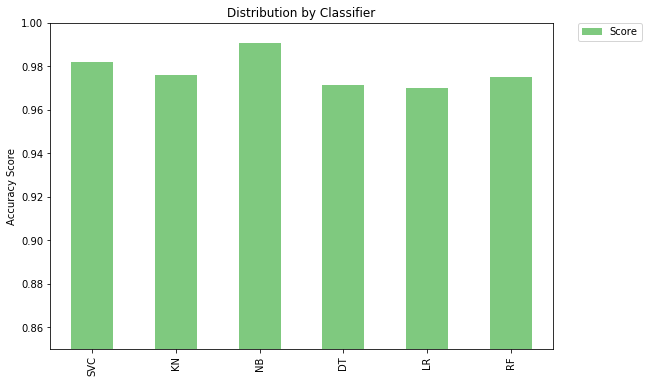

In [25]:
predictions.plot(kind='bar', ylim=(0.85,1.0), figsize=(9,6), align='center', colormap="Accent")
plt.xticks(np.arange(6), predictions.index)
plt.ylabel('Accuracy Score')
plt.title('Distribution by Classifier')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# Testing Sample Data

From the above list of classifiers, it is clear that Naive Bayes classifier gives the highest accuracy. Hence, we predict our sample test data with that classifier. 

In [26]:
def find(p):
    if p == 1:
        print ("Message is SPAM")
    else:
        print ("Message is NOT Spam")


In [27]:
#text = "Free tones Hope you enjoyed your new content"
#integers = vectorizer.transform(preprocess_text(text))

In [28]:
from sklearn.externals import joblib
joblib.dump(mnb, 'best.pkl')
print ("Best Model (Naive Bayes) Saved")

Best Model (Naive Bayes) Saved


In [29]:
best = joblib.load('best.pkl')

In [30]:
best

MultinomialNB(alpha=0.2, class_prior=None, fit_prior=True)

In [31]:
text1 = "Free tones Hope you enjoyed your new content"
text2 = "No. I meant the calculation is the same. That I'll call later"
text3 = "Had your contract mobile 11 Mnths? Latest Motorola Now"
text4 = "what are you doing?"

integers1 = vectorizer.transform([preprocess_text(text1)])
integers2 = vectorizer.transform([preprocess_text(text2)])
integers3 = vectorizer.transform([preprocess_text(text3)])
integers4 = vectorizer.transform([preprocess_text(text4)])

In [32]:
p1 = best.predict(integers1)[0]
p2 = best.predict(integers2)[0]
p3 = best.predict(integers3)[0]
p4 = best.predict(integers4)[0]

find(p1)
find(p2)
find(p3)
find(p4)

Message is SPAM
Message is NOT Spam
Message is SPAM
Message is NOT Spam
